In [1]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
import sklearn
def ignore_warn(*args, **kwargs):
    pass

warnings.warn = ignore_warn 
from scipy import stats
from scipy.stats import norm, skew #for some statistics
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

from subprocess import check_output
print(check_output(["ls", "./data"]).decode("utf8")) #check the files available in the directory

data_description.txt
house-prices-advanced-regression-techniques.zip
sample_submission.csv
submission.csv
test.csv
train.csv



In [30]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [3]:
train.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL       65.000     8450   Pave   NaN      Reg   
1   2          20       RL       80.000     9600   Pave   NaN      Reg   
2   3          60       RL       68.000    11250   Pave   NaN      IR1   
3   4          70       RL       60.000     9550   Pave   NaN      IR1   
4   5          60       RL       84.000    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))
train_ID = train['Id']
test_ID = test['Id']
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 

The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


In [14]:
test.iloc[:1].to_json(orient='split')

'{"columns":["Id","MSSubClass","MSZoning","LotFrontage","LotArea","Street","Alley","LotShape","LandContour","Utilities","LotConfig","LandSlope","Neighborhood","Condition1","Condition2","BldgType","HouseStyle","OverallQual","OverallCond","YearBuilt","YearRemodAdd","RoofStyle","RoofMatl","Exterior1st","Exterior2nd","MasVnrType","MasVnrArea","ExterQual","ExterCond","Foundation","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinSF1","BsmtFinType2","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","Heating","HeatingQC","CentralAir","Electrical","1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","KitchenQual","TotRmsAbvGrd","Functional","Fireplaces","FireplaceQu","GarageType","GarageYrBlt","GarageFinish","GarageCars","GarageArea","GarageQual","GarageCond","PavedDrive","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","PoolQC","Fence","MiscFeature","MiscVal","MoSold","YrSold","SaleType

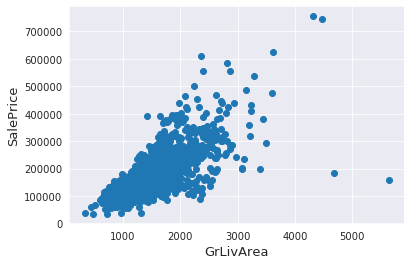

In [5]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

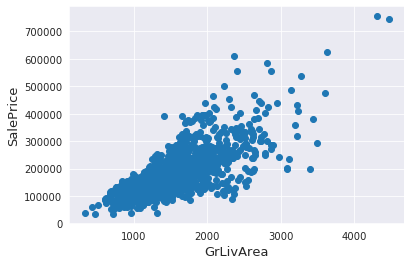

In [6]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()



 mu = 180932.92 and sigma = 79467.79



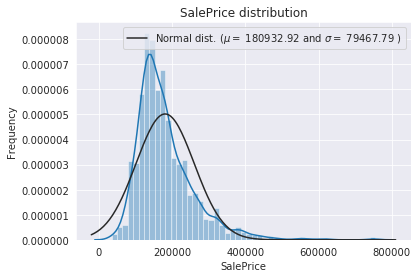

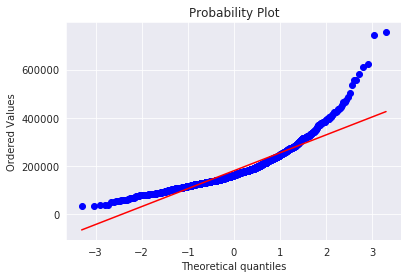

In [7]:
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()


 mu = 12.02 and sigma = 0.40



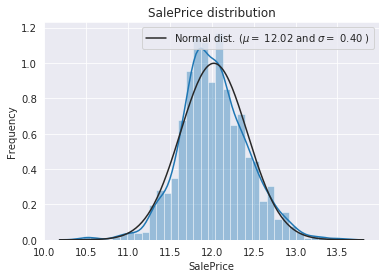

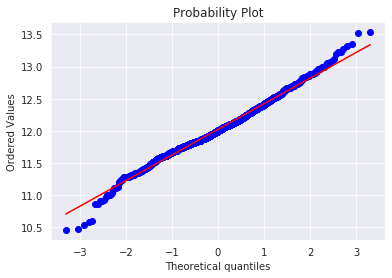

In [8]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()


In [9]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 79)


In [10]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

Missing Ratio
PoolQC               99.691
MiscFeature          96.400
Alley                93.212
Fence                80.425
FireplaceQu          48.680
LotFrontage          16.661
GarageQual            5.451
GarageCond            5.451
GarageFinish          5.451
GarageYrBlt           5.451
GarageType            5.382
BsmtExposure          2.811
BsmtCond              2.811
BsmtQual              2.777
BsmtFinType2          2.743
BsmtFinType1          2.708
MasVnrType            0.823
MasVnrArea            0.788
MSZoning              0.137
BsmtFullBath          0.069

Text(0.5, 1.0, 'Percent missing data by feature')

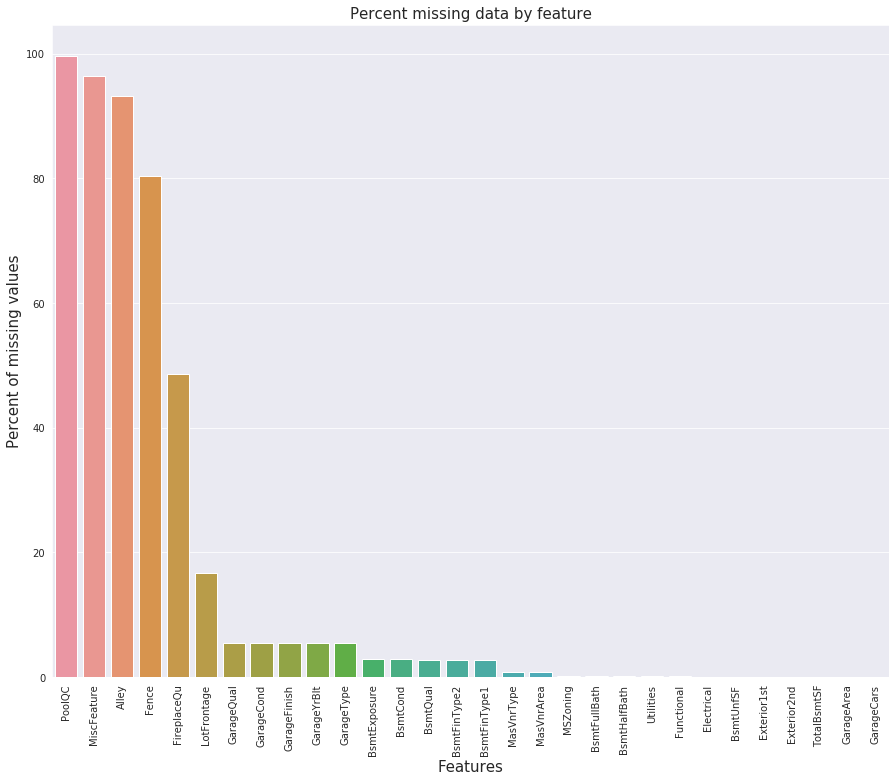

In [11]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)


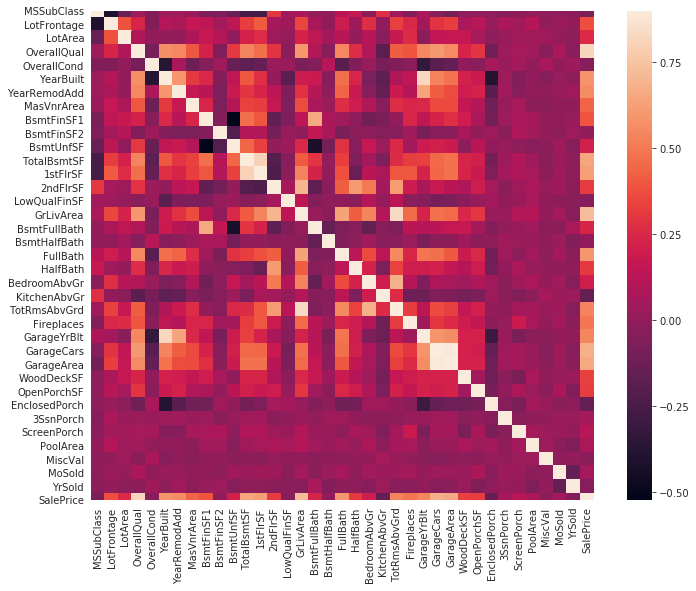

In [12]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [16]:
all_data = test

In [20]:
all_data['SalePrice']

KeyError: 'SalePrice'

In [51]:
import logging
import numpy as np
import pandas as pd
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import sklearn
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm, skew
from scipy.special import boxcox1p

# Limiting floats output to 3 decimal points
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

logger = logging.getLogger(__name__)

logging.info('variables successfully fetched from previous task')
logging.info('Start preprocessing data')

# read csv
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

train_ID = train['Id']
test_ID = test['Id']

train.drop("Id", axis=1, inplace=True)
test.drop("Id", axis=1, inplace=True)

# Deleting outliers
train = train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000)].index)

train["SalePrice"] = np.log1p(train["SalePrice"])
# concat train and test data for preprocessing
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
logging.info("all_data size is : {}".format(all_data.shape))

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'MiscFeature', 'Alley',
            'Fence', 'FireplaceQu', 'MasVnrType'):
    all_data[col] = all_data[col].fillna('None')

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea'):
    all_data[col] = all_data[col].fillna(0)

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MSSubClass'):
    all_data[col] = all_data[col].fillna('None')

for col in ('MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType'):
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

for col in ('MSSubClass', 'OverallCond', 'YrSold', 'MoSold'):
    all_data[col] = all_data[col].astype(str)

all_data = all_data.drop(['Utilities'], axis=1)
all_data["Functional"] = all_data["Functional"].fillna("Typ")

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond',
        'ExterQual', 'ExterCond', 'HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1',
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond',
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[c].values))
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape
logging.info('Shape all_data: {}'.format(all_data.shape))

all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
logging.info("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew': skewed_feats})

skewness = skewness[abs(skewness) > 0.75]
logging.info("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

all_data = pd.get_dummies(all_data)
logging.info(all_data.shape)

train = all_data[:ntrain]
label = y_train
test = all_data[ntrain:]

In [52]:
[train, label, test, test_ID]

[      1stFlrSF  2ndFlrSF  3SsnPorch  Alley  BedroomAbvGr  BsmtCond  \
 0       11.693    11.686      0.000  0.730         1.541     1.820   
 1       12.792     0.000      0.000  0.730         1.541     1.820   
 2       11.892    11.725      0.000  0.730         1.541     1.820   
 3       12.014    11.354      0.000  0.730         1.541     0.730   
 4       12.511    12.271      0.000  0.730         1.820     1.820   
 ...        ...       ...        ...    ...           ...       ...   
 1453    11.990    11.125      0.000  0.730         1.541     1.820   
 1454    14.295     0.000      0.000  0.730         1.541     1.820   
 1455    12.617    12.528      0.000  0.730         1.820     0.730   
 1456    12.338     0.000      0.000  0.730         1.194     1.820   
 1457    12.778     0.000      0.000  0.730         1.541     1.820   
 
       BsmtExposure  BsmtFinSF1  BsmtFinSF2  BsmtFinType1  ...  \
 0            1.541      11.170       0.000         1.194  ...   
 1            

In [53]:
train

1stFlrSF  2ndFlrSF  3SsnPorch  Alley  BedroomAbvGr  BsmtCond  \
0       11.693    11.686      0.000  0.730         1.541     1.820   
1       12.792     0.000      0.000  0.730         1.541     1.820   
2       11.892    11.725      0.000  0.730         1.541     1.820   
3       12.014    11.354      0.000  0.730         1.541     0.730   
4       12.511    12.271      0.000  0.730         1.820     1.820   
...        ...       ...        ...    ...           ...       ...   
1453    11.990    11.125      0.000  0.730         1.541     1.820   
1454    14.295     0.000      0.000  0.730         1.541     1.820   
1455    12.617    12.528      0.000  0.730         1.820     0.730   
1456    12.338     0.000      0.000  0.730         1.194     1.820   
1457    12.778     0.000      0.000  0.730         1.541     1.820   

      BsmtExposure  BsmtFinSF1  BsmtFinSF2  BsmtFinType1  ...  \
0            1.541      11.170       0.000         1.194  ...   
1            0.730      12.063       0.000         0.000  ...   
2            1.194      10.200       0.000         1.194  ...   
3            1.541       8.274       0.000         0.000  ...   
4            0.000      10.971       0.000         1.194  ...   
...            ...         ...         ...           ...  ...   
1453         1.541       0.000       0.000         2.260  ...   
1454         1.541      11.473       7.660         0.000  ...   
1455         1.541       8.823       0.000         1.194  ...   
1456         1.194       5.322      12.206         1.194  ...   
1457         1.541      11.608       8.947         0.730  ...   

      SaleCondition_Partial  SaleType_COD  SaleType_CWD  SaleType_Con  \
0                         0             0             0             0   
1                         0             0             0             0   
2                         0             0             0             0   
3                         0             0             0             0   
4                         0             0             0             0   
...                     ...           ...           ...           ...   
1453                      0             0             0             0   
1454                      0             0             0             0   
1455                      0             0             0             0   
1456                      0             0             0             0   
1457                      0             0             0             0   

      SaleType_ConLD  SaleType_ConLI  SaleType_ConLw  SaleType_New  \
0                  0               0               0             0   
1                  0               0               0             0   
2                  0               0               0             0   
3                  0               0               0             0   
4                  0               0               0             0   
...              ...             ...             ...           ...   
1453               0               0               0             0   
1454               0               0               0             0   
1455               0               0               0             0   
1456               0               0               0             0   
1457               0               0               0             0   

      SaleType_Oth  SaleType_WD  
0                0            1  
1                0            1  
2                0            1  
3                0            1  
4                0            1  
...            ...          ...  
1453             0            1  
1454             0            1  
1455             0            1  
1456             0            1  
1457             0            1  

[1458 rows x 220 columns]

In [54]:
label

array([12.24769912, 12.10901644, 12.31717117, ..., 12.49313327,
       11.86446927, 11.90159023])

In [55]:
test

1stFlrSF  2ndFlrSF  3SsnPorch  Alley  BedroomAbvGr  BsmtCond  \
1458    11.819     0.000      0.000  0.730         1.194     1.820   
1459    12.944     0.000      0.000  0.730         1.541     1.820   
1460    11.916    11.151      0.000  0.730         1.541     1.820   
1461    11.910    11.063      0.000  0.730         1.541     1.820   
1462    12.834     0.000      0.000  0.730         1.194     1.820   
...        ...       ...        ...    ...           ...       ...   
2912    10.497    10.497      0.000  0.730         1.541     1.820   
2913    10.497    10.497      0.000  0.730         1.541     1.820   
2914    12.703     0.000      0.000  0.730         1.820     1.820   
2915    12.040     0.000      0.000  0.730         1.541     1.820   
2916    12.114    12.137      0.000  0.730         1.541     1.820   

      BsmtExposure  BsmtFinSF1  BsmtFinSF2  BsmtFinType1  ...  \
1458         1.541      10.105       7.397         2.056  ...   
1459         1.541      11.901       0.000         0.000  ...   
1460         1.541      11.477       0.000         1.194  ...   
1461         1.541      10.750       0.000         1.194  ...   
1462         1.541       8.720       0.000         0.000  ...   
...            ...         ...         ...           ...  ...   
2912         1.541       0.000       0.000         2.260  ...   
2913         1.541       8.622       0.000         2.056  ...   
2914         1.541      12.703       0.000         0.000  ...   
2915         0.000       9.301       0.000         1.194  ...   
2916         0.000      11.361       0.000         1.541  ...   

      SaleCondition_Partial  SaleType_COD  SaleType_CWD  SaleType_Con  \
1458                      0             0             0             0   
1459                      0             0             0             0   
1460                      0             0             0             0   
1461                      0             0             0             0   
1462                      0             0             0             0   
...                     ...           ...           ...           ...   
2912                      0             0             0             0   
2913                      0             0             0             0   
2914                      0             0             0             0   
2915                      0             0             0             0   
2916                      0             0             0             0   

      SaleType_ConLD  SaleType_ConLI  SaleType_ConLw  SaleType_New  \
1458               0               0               0             0   
1459               0               0               0             0   
1460               0               0               0             0   
1461               0               0               0             0   
1462               0               0               0             0   
...              ...             ...             ...           ...   
2912               0               0               0             0   
2913               0               0               0             0   
2914               0               0               0             0   
2915               0               0               0             0   
2916               0               0               0             0   

      SaleType_Oth  SaleType_WD  
1458             0            1  
1459             0            1  
1460             0            1  
1461             0            1  
1462             0            1  
...            ...          ...  
2912             0            1  
2913             0            1  
2914             0            1  
2915             0            1  
2916             0            1  

[1459 rows x 220 columns]

In [56]:
test_ID

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [48]:
train = pd.read_csv('./data/train.csv')

In [49]:
train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL       65.000     8450   Pave   NaN      Reg   
1        2          20       RL       80.000     9600   Pave   NaN      Reg   
2        3          60       RL       68.000    11250   Pave   NaN      IR1   
3        4          70       RL       60.000     9550   Pave   NaN      IR1   
4        5          60       RL       84.000    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL       62.000     7917   Pave   NaN      Reg   
1456  1457          20       RL       85.000    13175   Pave   NaN      Reg   
1457  1458          70       RL       66.000     9042   Pave   NaN      Reg   
1458  1459          20       RL       68.000     9717   Pave   NaN      Reg   
1459  1460          20       RL       75.000     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [50]:
test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH       80.000    11622   Pave   NaN      Reg   
1     1462          20       RL       81.000    14267   Pave   NaN      IR1   
2     1463          60       RL       74.000    13830   Pave   NaN      IR1   
3     1464          60       RL       78.000     9978   Pave   NaN      IR1   
4     1465         120       RL       43.000     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM       21.000     1936   Pave   NaN      Reg   
1455  2916         160       RM       21.000     1894   Pave   NaN      Reg   
1456  2917          20       RL      160.000    20000   Pave   NaN      Reg   
1457  2918          85       RL       62.000    10441   Pave   NaN      Reg   
1458  2919          60       RL       74.000     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub  ...         120        0    NaN  MnPrv   
1            Lvl    AllPub  ...           0        0    NaN    NaN   
2            Lvl    AllPub  ...           0        0    NaN  MnPrv   
3            Lvl    AllPub  ...           0        0    NaN    NaN   
4            HLS    AllPub  ...         144        0    NaN    NaN   
...          ...       ...  ...         ...      ...    ...    ...   
1454         Lvl    AllPub  ...           0        0    NaN    NaN   
1455         Lvl    AllPub  ...           0        0    NaN    NaN   
1456         Lvl    AllPub  ...           0        0    NaN    NaN   
1457         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1458         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0      6    2010        WD         Normal  
1           Gar2   12500      6    2010        WD         Normal  
2            NaN       0      3    2010        WD         Normal  
3            NaN       0      6    2010        WD         Normal  
4            NaN       0      1    2010        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[1459 rows x 80 columns]

In [58]:
test

1stFlrSF  2ndFlrSF  3SsnPorch  Alley  BedroomAbvGr  BsmtCond  \
1458    11.819     0.000      0.000  0.730         1.194     1.820   
1459    12.944     0.000      0.000  0.730         1.541     1.820   
1460    11.916    11.151      0.000  0.730         1.541     1.820   
1461    11.910    11.063      0.000  0.730         1.541     1.820   
1462    12.834     0.000      0.000  0.730         1.194     1.820   
...        ...       ...        ...    ...           ...       ...   
2912    10.497    10.497      0.000  0.730         1.541     1.820   
2913    10.497    10.497      0.000  0.730         1.541     1.820   
2914    12.703     0.000      0.000  0.730         1.820     1.820   
2915    12.040     0.000      0.000  0.730         1.541     1.820   
2916    12.114    12.137      0.000  0.730         1.541     1.820   

      BsmtExposure  BsmtFinSF1  BsmtFinSF2  BsmtFinType1  ...  \
1458         1.541      10.105       7.397         2.056  ...   
1459         1.541      11.901       0.000         0.000  ...   
1460         1.541      11.477       0.000         1.194  ...   
1461         1.541      10.750       0.000         1.194  ...   
1462         1.541       8.720       0.000         0.000  ...   
...            ...         ...         ...           ...  ...   
2912         1.541       0.000       0.000         2.260  ...   
2913         1.541       8.622       0.000         2.056  ...   
2914         1.541      12.703       0.000         0.000  ...   
2915         0.000       9.301       0.000         1.194  ...   
2916         0.000      11.361       0.000         1.541  ...   

      SaleCondition_Partial  SaleType_COD  SaleType_CWD  SaleType_Con  \
1458                      0             0             0             0   
1459                      0             0             0             0   
1460                      0             0             0             0   
1461                      0             0             0             0   
1462                      0             0             0             0   
...                     ...           ...           ...           ...   
2912                      0             0             0             0   
2913                      0             0             0             0   
2914                      0             0             0             0   
2915                      0             0             0             0   
2916                      0             0             0             0   

      SaleType_ConLD  SaleType_ConLI  SaleType_ConLw  SaleType_New  \
1458               0               0               0             0   
1459               0               0               0             0   
1460               0               0               0             0   
1461               0               0               0             0   
1462               0               0               0             0   
...              ...             ...             ...           ...   
2912               0               0               0             0   
2913               0               0               0             0   
2914               0               0               0             0   
2915               0               0               0             0   
2916               0               0               0             0   

      SaleType_Oth  SaleType_WD  
1458             0            1  
1459             0            1  
1460             0            1  
1461             0            1  
1462             0            1  
...            ...          ...  
2912             0            1  
2913             0            1  
2914             0            1  
2915             0            1  
2916             0            1  

[1459 rows x 220 columns]

In [59]:
np.expm1(11.702433586120605)

120864.49396180944

In [60]:
169277.0524984 - 120864.49396180944

48412.55853659057